# Домашнее задание по статистическому анализу на python

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [105]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [106]:
df.head ()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


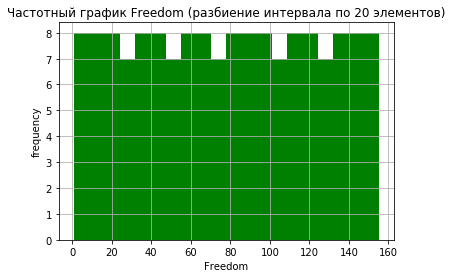

In [107]:
plt.hist(df['Freedom'], 20, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()
# похоже на равномерное распределение

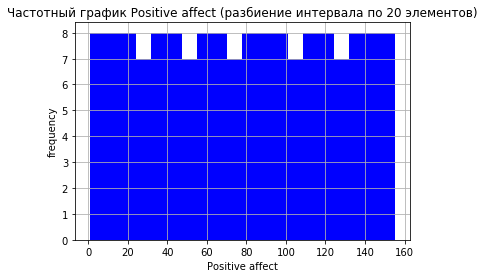

In [89]:
plt.hist(df['Positive affect'], 20, facecolor='b')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()
# похоже на равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [90]:
#математическое ожидание, стандартное отклонение, минимум и максимум можно посмотреть так:
df ['Freedom'].describe ()
# стоит учесть, что здесь учитывается выброс, в колонке Freedom имеется значение Nan

count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: Freedom, dtype: float64

In [109]:
# можно воспользоваться библиотекой statistic, но сначала нужно заполнить отсутствующие значения. 
# решила заполнить отсутствующие значения средним значением, мне кажется так Nan будут меньше влиять 
#на стандартное отклонение и дисперсию
df1 = df.fillna (value = df ['Freedom'].mean () and df ['Positive affect'].mean ())

In [92]:
print ('Математическое ожидание равно: ', statistics.mean (df1['Freedom']))
print ('Стандартное отклонение равно: ', statistics.stdev (df1['Freedom']))
print ('Дисперсия равна: ', statistics.variance (df1['Freedom']))
print ('Минимум равен: ', min (df1['Freedom']))
print ('Максимум равен: ', max (df1['Freedom']))
print ('Выбросы: ', df ['Freedom'].isnull().sum())
print ('Размах для колонки Freedom равен: ', max (df1['Freedom']) - min (df1['Freedom']))

Математическое ожидание равно:  78.0
Стандартное отклонение равно:  44.74371464239419
Дисперсия равна:  2002.0
Минимум равен:  1.0
Максимум равен:  155.0
Выбросы:  1
Размах для колонки Freedom равен:  154.0


In [93]:
#для сравнения. Что будет, если мы просто удаляем значение Nan. Стандартное отклонение изменилось сильнее,
# То же самое и для дисперсии.
dfp = df.dropna ()
print ('Стандартное отклонение равно: ', statistics.stdev (dfp['Freedom']))
print ('Дисперсия равна: ', statistics.variance (dfp['Freedom']))

Стандартное отклонение равно:  45.108971631877274
Дисперсия равна:  2034.8193216855088


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601656


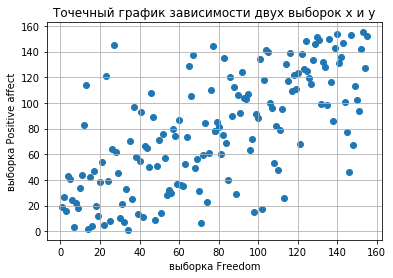

In [94]:
freedom = df1['Freedom']
positive_affect = df1['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='o')
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент корреляции Пирсона:', corr)
# Значение положительное. Это говорит о том, что корреляция есть, но довольно слабая. 

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [95]:
freedom_1 = freedom - statistics.mean(freedom)
print('Централизованное среднее значение равно: ', statistics.mean(freedom_1))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print('Масштабированный минимум равен: ', min(freedom_2))
print('Масштабированный максимум равен: ', max(freedom_2))

Централизованное среднее значение равно:  0.0
Масштабированный минимум равен:  [-1.]
Масштабированный максимум равен:  [1.]


Построить матрицу корреляций для всех колонок таблицы

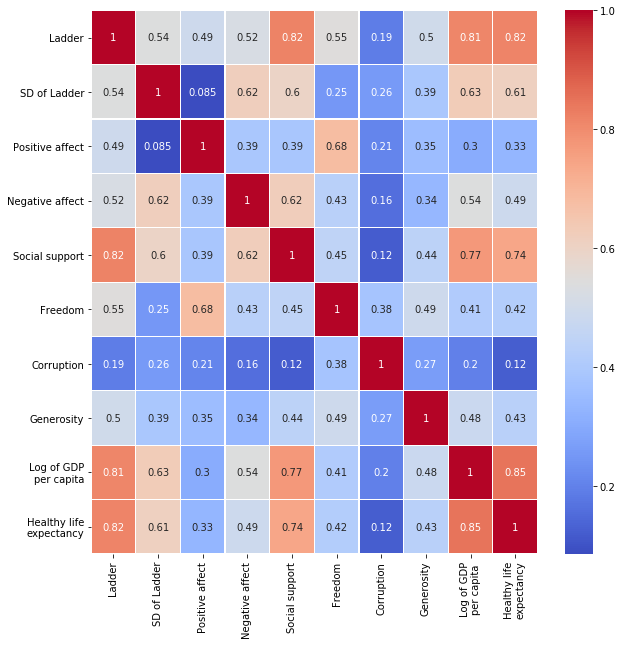

In [96]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap= 'coolwarm',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

Загрузить следующую таблицу: 

In [97]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

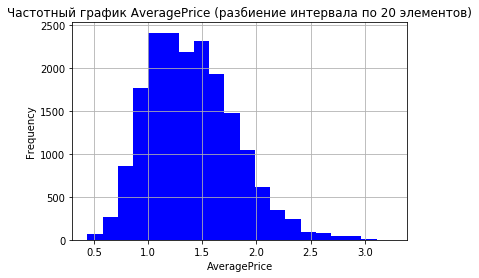

In [98]:
plt.hist(df['AveragePrice'], 20, facecolor='b')

plt.xlabel('AveragePrice')
plt.ylabel('Frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()
# похоже на нормальное распределение

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [99]:
#сначала проверим данные на отсутствие значения Null
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [100]:
# вводим переменные для колонок
avocado = df['4046']
average_price = df['AveragePrice']
total_volume = df ['Total Volume']
total_bags = df ['Total Bags']
# централизуем их и масштабируем
avocado2 = min_max_scaler.fit_transform(np.array(avocado - statistics.mean(avocado)).reshape(-1, 1))
average_price2 = min_max_scaler.fit_transform(np.array(average_price - statistics.mean(average_price)).reshape(-1, 1))
total_volume2 = min_max_scaler.fit_transform(np.array(total_volume - statistics.mean(total_volume)).reshape(-1, 1))
total_bags2 = min_max_scaler.fit_transform(np.array(total_bags - statistics.mean(total_bags)).reshape(-1, 1))

Коэффициент корреляции Пирсона между авокадо 4046 и AveragePrice: [-0.20831705]


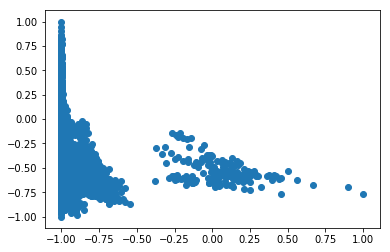

In [101]:
corr, p_value = pearsonr(avocado2, average_price2)
print('Коэффициент корреляции Пирсона между авокадо 4046 и AveragePrice:', corr)
plt.scatter(avocado2, average_price2, marker='o')

Коэффициент корреляции Пирсона между авокадо 4046 и Total Volume: [0.97786316]


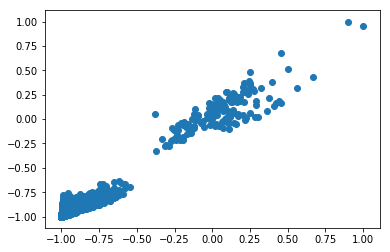

In [102]:
corr, p_value = pearsonr(avocado2, total_volume2)
print('Коэффициент корреляции Пирсона между авокадо 4046 и Total Volume:', corr)
plt.scatter(avocado2, total_volume2, marker='o')

Коэффициент корреляции Пирсона между авокадо 4046 и Total Bags: [0.92005658]


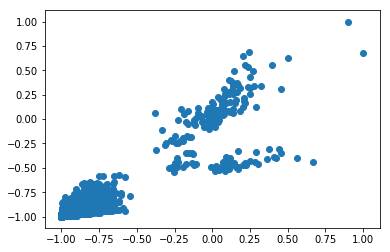

In [103]:
corr, p_value = pearsonr(avocado2, total_bags2)
print('Коэффициент корреляции Пирсона между авокадо 4046 и Total Bags:', corr)
plt.scatter(avocado2, total_bags2, marker='o')

Корреляция между 4046 - Total number of avocados with PLU 4046 sold и Average Price отсутствует. 
Зато между 4046 - Total number of avocados with PLU 4046 sold и Total Volume корреляция очень сильна (0.97786316 - коэффициент Пирсона). 
Логично, чем больше авокадо, тем больше общий объем.
Между 4046 - Total number of avocados with PLU 4046 sold и Total Bags корреляция тоже очень сильна (0.92005658 - коэффициент Пирсона)
Логично, чем больше авокадо покупают, тем больше сумок требуется.